In [1]:
"""
Code goal: use SALib to perform Sobol analysis on the reliability test problem
Author: Haochen Ye (hxy46@psu.edu)
"""
#Import required libraries
%reset -f
import numpy as np
import math
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
import warnings
warnings.filterwarnings("ignore")

In [2]:
# step 1: define models/problems
# y=1 if x1x2>=0.75; y=0 otherwise. 
def Reliability(x1, x2):
    return float(math.floor(x1*x2/0.75))

# step 2: define problem input variables and boundaries
problem = {
    'num_vars': 2,
    'names': ['x2', 'x1'],
    'bounds': [[0, 1],[0, 1]]
}

In [3]:
"""
Step 3: generate samples, sobol.analyze() function can only use saltelli sampling.
Best to use 2^k samples for best convergence.
"""
k=15
param_values = saltelli.sample(problem,2**k)

# Step 4: evaluate outputs
y = np.array([Reliability(*params) for params in param_values])

In [4]:
# analyze: "problem" contains input parameters, "Y" contains output
# if (by default) second-order indices are calculated, then sample size must be N(2k+2)
# if only need to calculate first order indices, sample size must be N(k+2)
sobol_indices = sobol.analyze(problem, y, print_to_console=True,calc_second_order=True)

          ST   ST_conf
x2  0.854206  0.036164
x1  0.858818  0.034719
          S1   S1_conf
x2  0.139419  0.020703
x1  0.141934  0.019763
              S2   S2_conf
(x2, x1)  0.7201  0.055651


In [6]:
#Plot of Sobol indices versus sample size
S1=[0]*100
S2=[0]*100
S3=[0]*100
S1_up=[0]*100
S2_up=[0]*100
S3_up=[0]*100
S1_low=[0]*100
S2_low=[0]*100
S3_low=[0]*100
for i in range(0,100):
    param_values = saltelli.sample(problem,(i+1)*500)
    y = np.array([Reliability(*params) for params in param_values])
    sobol_indices = sobol.analyze(problem, y, calc_second_order=True)
    S1[i] = sobol_indices["S1"][0]
    S2[i] = sobol_indices["S1"][1]
    S3[i] = sobol_indices["S2"][0,1]
    S1_up[i] = S1[i]+sobol_indices["S1_conf"][0]
    S1_low[i] = S1[i]-sobol_indices["S1_conf"][0]
    S2_up[i] = S2[i]+sobol_indices["S1_conf"][1]
    S2_low[i] = S2[i]-sobol_indices["S1_conf"][1]
    S3_up[i] = S3[i]+sobol_indices["S2_conf"][0,1]
    S3_low[i] = S3[i]-sobol_indices["S2_conf"][0,1]


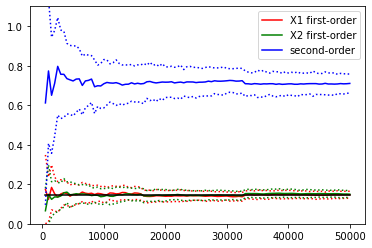

In [10]:
plt.plot(list(range(500,50001,500)),S1,'r',label="X1 first-order")
plt.plot(list(range(500,50001,500)),S2,'g',label="X2 first-order")
plt.plot(list(range(500,50001,500)),S3,'b',label="second-order")
plt.plot(list(range(500,50001,500)),S1_up,'r',linestyle="dotted")
plt.plot(list(range(500,50001,500)),S2_up,'g',linestyle="dotted")
plt.plot(list(range(500,50001,500)),S3_up,'b',linestyle="dotted")
plt.plot(list(range(500,50001,500)),S1_low,'r',linestyle="dotted")
plt.plot(list(range(500,50001,500)),S2_low,'g',linestyle="dotted")
plt.plot(list(range(500,50001,500)),S3_low,'b',linestyle="dotted")
plt.plot(list(range(500,50001,500)),[0.1453]*100,'k')
plt.ylim([0, 1.1])
plt.legend(loc='best')
plt.show()